In [34]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
#경로 설정
directory= 'C:\\Users\\USER\\PycharmProjects\\ERC\\'
os.chdir(directory)

In [117]:
def visual(data, data_n, method):
    for c in ['Emotion']: #['Emotion', 'Sex']
        sns.scatterplot(x=data[0], y=data[1], hue=data[c], alpha=.2, s=80)
        plt.xlabel('')
        plt.ylabel('')
        plt.savefig('img/{}/{}_{}.png'.format(method, data_n, c))
        plt.show()

Dimension Reduction
---

In [113]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding
import umap

def dim_red(data_n, method):
    
    data = pd.read_csv('data/{}.csv'.format(data_n), encoding='cp949')
    data_f = data.drop(['id', 'Emotion', 'Sex', 'Arousal', 'Valence'], axis='columns')
    
    if method == 'pca':
        red = PCA(n_components=2)
    elif method == 'tsne':
        red = TSNE(n_components=2) #5~50, default=30
    elif method == 'lle':
        red = LocallyLinearEmbedding(n_components=2) 
    elif method == 'umap':
        red = umap.UMAP(n_components=2) #, n_neighbors=15, min_dist=0.25)  #n_neighbors=15, min_dist=0.25
    else:
        print('No Method')
    
    data_red = red.fit_transform(data_f)
    data_red = pd.DataFrame(data_red)
    data_all = pd.concat([data[['Emotion', 'Sex', 'Arousal', 'Valence']], data_red], axis=1)
    data_all.to_csv('data/red/{}_{}.csv'.format(data_n, method), index=False)

    visual(data_all, data_n, method)

In [ ]:
data_n = 'temp' #temp, ibi, eda, eda_ibi, eda_temp, temp_ibi, eda_ibi_temp
method = 'tsne' #pca, tsne, umap

dim_red(data_n, method)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


3차원 축소
---

In [29]:
data_n = 'temp_ibi' #temp, ibi, eda
method = 'tsne' #pca, tsne, umap

data = pd.read_csv('data/{}.csv'.format(data_n), encoding='cp949')
data_f = data.drop(['id', 'Emotion', 'Sex', 'Arousal', 'Valence'], axis='columns')
    
if method == 'pca':
        red = PCA(n_components=2)
elif method == 'tsne':
        red = TSNE(n_components=3)
elif method == 'lle':
        red = LocallyLinearEmbedding(n_components=2) 
elif method == 'umap':
        red = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.25) 
else:
        print('No Method')
    
data_red = red.fit_transform(data_f)
data_red = pd.DataFrame(data_red, columns=['component 0', 'component 1', 'component 2'])
data_all = pd.concat([data[['Emotion', 'Sex']], data_red], axis=1)
data_all.to_csv('data/red/{}_{}.csv'.format(data_n, method), index=False)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


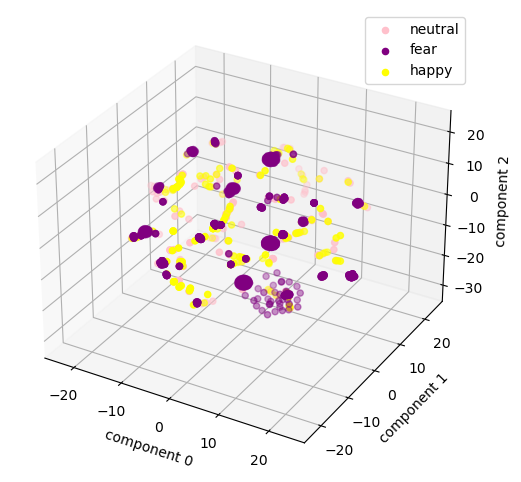

In [33]:
tsne_df = data_all

from mpl_toolkits.mplot3d import Axes3D

# 3차원 그래프 세팅
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

# target 별 분리
tsne_df_0 = tsne_df[tsne_df['Emotion'] == 'neutral']
tsne_df_1 = tsne_df[tsne_df['Emotion'] == 'fear']
tsne_df_2 = tsne_df[tsne_df['Emotion'] == 'happy']

# target 별 시각화
ax.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], tsne_df_0['component 2'], color = 'pink', label ='neutral')
ax.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], tsne_df_1['component 2'], color = 'purple', label = 'fear')
ax.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], tsne_df_2['component 2'], color = 'yellow', label = 'happy')

ax.set_xlabel('component 0')
ax.set_ylabel('component 1')
ax.set_zlabel('component 2')
ax.legend()
plt.show()